In [181]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [182]:
np.random.seed(42)

In [183]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
!ls

_01_module_2_.ipynb _ass_module_2.ipynb housing.csv


In [184]:
key_features = [
  'latitude',
  'longitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'median_house_value']

data = pd.read_csv('housing.csv', usecols=key_features)
data.shape

(20640, 9)

In [185]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [186]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

q. 2

In [187]:
data.population.median()

1166.0

1. Split the data
2. Shuffle the initial dataset, use seed 42.
3. Split your data in train/val/test sets, with 60%/20%/20% distribution.
4. Make sure that the target value ('median_house_value') is not in your dataframe.
5. Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [188]:
n_val, n_test = int(len(data) * .2), int(len(data) * .2)
n_train = len(data) - n_val - n_test
n_train , n_val , n_test

idx = np.arange(len(data))
np.random.shuffle(idx)

data_train = data.iloc[idx[:n_train]].reset_index(drop=True)
data_val = data.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
data_test = data.iloc[idx[n_train + n_val:]].reset_index(drop=True)

data_train.shape, data_val.shape, data_test.shape

((12384, 9), (4128, 9), (4128, 9))

In [189]:
y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

data_train.drop(['median_house_value'], axis=1, inplace=True)
data_val.drop(['median_house_value'], axis=1, inplace=True)
data_test.drop(['median_house_value'], axis=1, inplace=True)

In [190]:
data_val.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-120.85,37.51,15.0,1131.0,285.0,728.0,281.0,1.5531
1,-118.25,34.09,52.0,1866.0,470.0,1211.0,417.0,2.9350
2,-122.02,37.31,34.0,2629.0,433.0,1301.0,431.0,6.0830
3,-121.88,37.30,16.0,2692.0,749.0,1674.0,681.0,2.6763
4,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434


q. 3

1. We need to deal with missing values for the column from Q1.
2. We have two options: fill it with 0 or with the mean of this variable.
3. Try both options. For each, train a linear regression model without regularization using the code from the lessons.
4. For computing the mean, use the training only!
5. Use the validation dataset to evaluate the models and compare the RMSE of each option.
6. Round the RMSE scores to 2 decimal digits using round(score, 2)
7. Which option gives better RMSE?


In [191]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)    

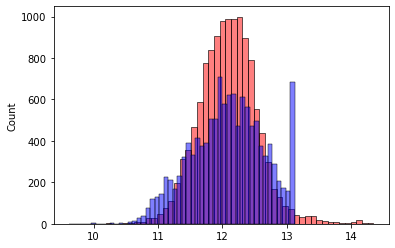

In [192]:
X_train_f0 = data_train.fillna(0).values

w0, w = train_linear_regression(X_train_f0, y_train)
y_pred_f0 = w0 + X_train_f0.dot(w)

sns.histplot(y_pred_f0, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50);

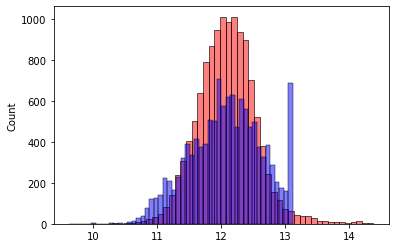

In [193]:
X_train_mu = data_train.fillna(int(data_train['total_bedrooms'].mean())).values

w0, w = train_linear_regression(X_train_mu, y_train)
y_pred_mu = w0 + X_train_mu.dot(w)

sns.histplot(y_pred_mu, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50);

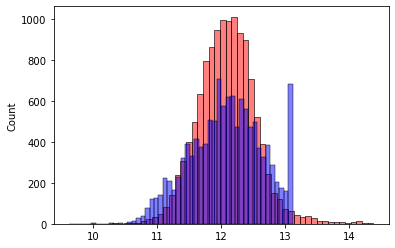

In [194]:
X_train_median = data_train.fillna(int(data_train['total_bedrooms'].median())).values

w0, w = train_linear_regression(X_train_median, y_train)
y_pred_median = w0 + X_train_median.dot(w)

sns.histplot(y_pred_median, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50);

In [195]:

print(f'fill NANs with 0: {round(rmse(y_train, y_pred_f0), 12)}')
print(f'fill NANs with mean: {round(rmse(y_train, y_pred_mu), 12)}')
print(f'fill NANs with median: {round(rmse(y_train, y_pred_median), 12)}')

fill NANs with 0: 0.341313591016
fill NANs with mean: 0.341041638247
fill NANs with median: 0.341060908758


In [196]:
def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X
    
X_train = prepare_X(data_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(data_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.32953303652286725

q. 4

In [197]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(data_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(data_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)    

0.0 -11.686975242036546 0.32953303652286725
1e-05 -11.686814584389676 0.3295330329448813
0.0001 -11.685368865034665 0.32953300097081006
0.001 -11.670931317799797 0.3295327038673711
0.1 -10.274500282195673 0.3296947205397184
1 -4.920480897742212 0.3337887220006137
10 -0.7899311831779244 0.3406063807809526


q. 5

In [200]:
scores = []

for seed in range(10):

  data = data.copy()

  np.random.seed(seed)

  idx = np.arange(len(data))
  np.random.shuffle(idx)

  # For each seed, do the train/validation/test split with 60%/20%/20% distribution.
  n_val, n_test = int(len(data) * .2), int(len(data) * .2)
  n_train = len(data) - n_val - n_test

  data_train = data.iloc[idx[:n_train]].reset_index(drop=True)
  data_val = data.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
  data_test = data.iloc[idx[n_train + n_val:]].reset_index(drop=True)

  y_train = np.log1p(data_train.median_house_value.values)
  y_val = np.log1p(data_val.median_house_value.values)
  y_test = np.log1p(data_test.median_house_value.values)

  del data_train['median_house_value']
  del data_val['median_house_value']
  del data_test['median_house_value']

  # Fill the missing values with 0 and 
  X_train = data_train.fillna(0).values
  X_val = data_val.fillna(0).values
  
  # train a model without regularization.
  w0, w = train_linear_regression(X_train, y_train)

  # For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
  y_pred = w0 + X_val.dot(w)

  scores.append(rmse(y_val, y_pred))
  
  print(f'for seed: {seed} RMSE: {rmse(y_val, y_pred)}')

print(f'standard deviation of scores {np.std(scores)}')

for seed: 0 RMSE: 0.33884304805312054
for seed: 1 RMSE: 0.33623872559561574
for seed: 2 RMSE: 0.33209123188419226
for seed: 3 RMSE: 0.3405153609033316
for seed: 4 RMSE: 0.3389024066572499
for seed: 5 RMSE: 0.34348667257182497
for seed: 6 RMSE: 0.34519809530992296
for seed: 7 RMSE: 0.33959899274099276
for seed: 8 RMSE: 0.34662308731846253
for seed: 9 RMSE: 0.33659261241693283
standard deviation of scores 0.004170771946619091


q.6

In [ ]:
np.random.seed(9)

idx = np.arange(len(data))
np.random.shuffle(idx)

# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
n_val, n_test = int(len(data) * .2), int(len(data) * .2)
n_train = len(data) - n_val - n_test

y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)


data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train + n_val]]
del data_train['median_house_value']
del data_val['median_house_value']


# Combine train and validation datasets.
y_train_val = np.concatenate([y_train, y_val])
data_train_val = pd.concat([data_train, data_val]).reset_index(drop=True)

data_test = data.iloc[idx[n_train + n_val:]].reset_index(drop=True)
del data_test['median_house_value']

# Fill the missing values with 0 and train a model with r=0.001.
X_train = data_train_val.fillna(0).values
X_test = data_test.fillna(0).values 
w0, w = train_linear_regression_reg(X_train, y_train_val, r=0.001)

# # For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
y_pred = w0 + X_test.dot(w)

print(f'RMSE: {rmse(y_test, y_pred)}')

# print(f'standard deviation of scores {np.std(scores)}')

RMSE: 0.34531689143645633
